In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


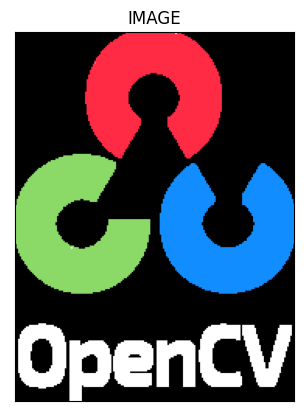

In [6]:
# here we will see the image smoothing/blurring which is very common in cv
## it is mostly used to remove the noise from the images
## there are various types of image filters which we can use to perform the 
# #image smoothing - Most common are: homogeneous, gaussian, median and bilateral
## we will see all of them one by one - starting from homoegeneous
## here we took the mean of all pixels inside the kernel and replace the pixels with the mean value
## thus each pixel here is contributing - therefore named as homogenous filter
## lets read the image first
img = cv.imread("./opencv-logo-white.png")

## We need to convert them into RGB mode before passing them to matplotlib.
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

##lets first define the titles and images to later display using plot
titles = ['IMAGE']
images = [img]
for i in range(len(titles)):
    plt.subplot(1,1, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

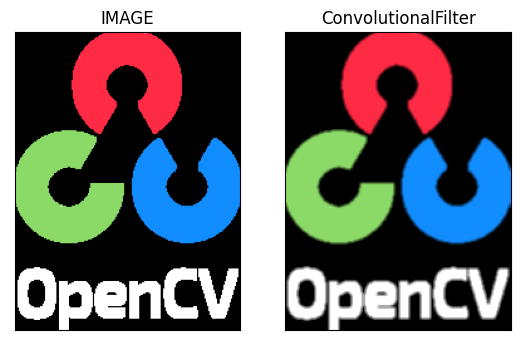

In [7]:
## first lets define the kernel - A kernel is a convolutional matrix or a mask as a small
## matrix- used for blurring, sharpening, embosing, edge detection and many more
## In homogenous, a kernel is defined as 1/kernel.widht*kernel.height[ones metrix]
## lets define a kernel -  using the above code
img = cv.imread("./opencv-logo-white.png")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

## lets define a kernel
kernel = np.ones((3,3), np.float32)/9 ## 1/kernel.width*kernel.height - Use odd kernels to get the center pixel - otherwise we wont 
                                        ## have a center pixel value - size of the kernel is proportional to the blur factor - larger the size more 
                                         ## blur will be the image as we will be taking more pixels into account to find the average
## lets apply this kernel to the image
dst = cv.filter2D(img, -1, kernel)

##lets first define the titles and images to later display using plot
titles = ['IMAGE', 'ConvolutionalFilter']
images = [img, dst]
for i in range(len(titles)):
    plt.subplot(1,2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

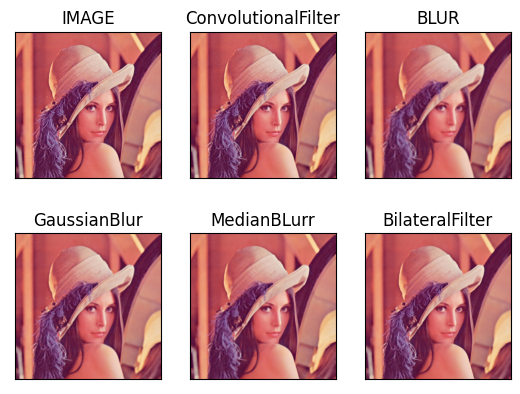

In [8]:
## In one dimensional signals, the images can be filtered with various low-pass filters -(
## assists in removing the noise and image blurring) and high pass filters - (assists
## in finding the edges) - lets see them one by one
## lets see the different blurr first. - reusing the above code

img = cv.imread("./Lena_Copy.png")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = np.ones((2,2), np.float32)/4 ## 1/kernel.width*kernel.height
dst = cv.filter2D(img, -1, kernel)

## lets apply the image blurr method
blur = cv.blur(img, (5,5))

## lets apply the gaussian method -  here we use different weight kernels in both x and y
## direction - Thus the middle pixels have more weightage as compared to the side one's
## it designed specifically to remove the high-frequency noise
gaus_blur = cv.GaussianBlur(img, (5,5), 0) ## the third argument is the standard deviation along X-Y axises. 
                                            ## by providing the value '0', we instructing the OpenCV to compute it 
                                             ##  based on the kernel size 
                                              ## The third argument is our color standard deviation, denoted as \sigma_{color}. 
                                               ## A larger value for \sigma_{color} means that more colors in the neighborhood will be considered when computing the blur. If we let \sigma_{color} get too large in respect to the diameter, then we essentially have broken the assumption of bilateral filtering — that only pixels of similar color should contribute significantly to the blur.

## lets apply next the median filter - it replaces the each pixel with the meidan values
## of all th neighboring pixels lies in a kernel - median is the middle value when a data set is ordered from least to greatest. 
## helpful to remove the salt and pepper noise - 
median = cv.medianBlur(img, (5))

## the next filter is bilateral filter - Most of the above filters also smooth the edges
## sometime we need our edges to be sharp. FOr that we use cv.bilateralFilter()
## it accomplishes this by introducing two Gaussian distributions - The first Gaussian function only considers spatial neighbors. That is, pixels that appear 
## close together in the (x, y)-coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring 
## that only pixels with similar intensity are included in the actual computation of the blur.
bilateralFilter = cv.bilateralFilter(img, 7, 65, 65) ## second argument define the diameter of our pixel neighborhood — 
                                                      ## the larger this diameter is, the more pixels will be included in the blurring computation. 
                                                       ## Think of this parameter as a square kernel size.
                                                        ## The third argument is our color standard deviation, denoted as \sigma_{color}. 
                                                         ## A larger value for \sigma_{color} means that more colors in the neighborhood will be considered when computing the blur. 
                                                          ## If we let \sigma_{color} get too large in respect to the diameter, then we essentially have broken the assumption of 
                                                           ## bilateral filtering — that only pixels of similar color should contribute significantly to the blur.
                                                            ## Finally, we need to supply the space standard deviation, which we call \sigma_{space}. A larger value of \sigma_{space} means 
                                                             ## that pixels farther out from the central pixel diameter will influence the blurring calculation.
                                
##lets first define the titles and images to later display using plot
titles = ['IMAGE', 'ConvolutionalFilter', "BLUR", "GaussianBlur", "MedianBLurr", "BilateralFilter"]
images = [img, dst, blur, gaus_blur, median, bilateralFilter]
for i in range(len(titles)):
    plt.subplot(2,3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()